In [1]:

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')


mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

mouse_df=pd.read_csv(mouse_drug_data_to_load)
clinical_df=pd.read_csv(clinical_trial_data_to_load)


complete_clinical_data=pd.merge(clinical_df,mouse_df,on="Mouse ID")



merged_df=complete_clinical_data

merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_vol=merged_df.groupby(['Drug','Timepoint'])
means=pd.DataFrame(tumor_vol['Tumor Volume (mm3)'].mean())

#index reset
means.reset_index(inplace=True)
means.rename(columns={'Tumor Volume (mm3)':'mean tumor vol'},inplace = True)

means.head()

,Drug,Timepoint,mean tumor vol
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [5]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
Error_df=pd.DataFrame(tumor_vol['Tumor Volume (mm3)'].sem())

#index reset
Error_df.reset_index(inplace=True)
Error_df.rename(columns={'Tumor Volume (mm3)':'sem tumor vol'},inplace = True)

Error_df.head()


,Drug,Timepoint,sem tumor vol
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


### Minor Data Munging to Re-Format the Data Frame

In [6]:
#pivot to display all the mean tumor volume for each drug over time
pivot_tumor_vol= means.pivot(index='Timepoint',columns='Drug', values='mean tumor vol')

pivot_tumor_vol




Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [7]:
#pivot to display all the sem tumor volume for each drug over time
pivot_sem = Error_df.pivot(index='Timepoint',columns='Drug')[ 'sem tumor vol']

pivot_sem

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


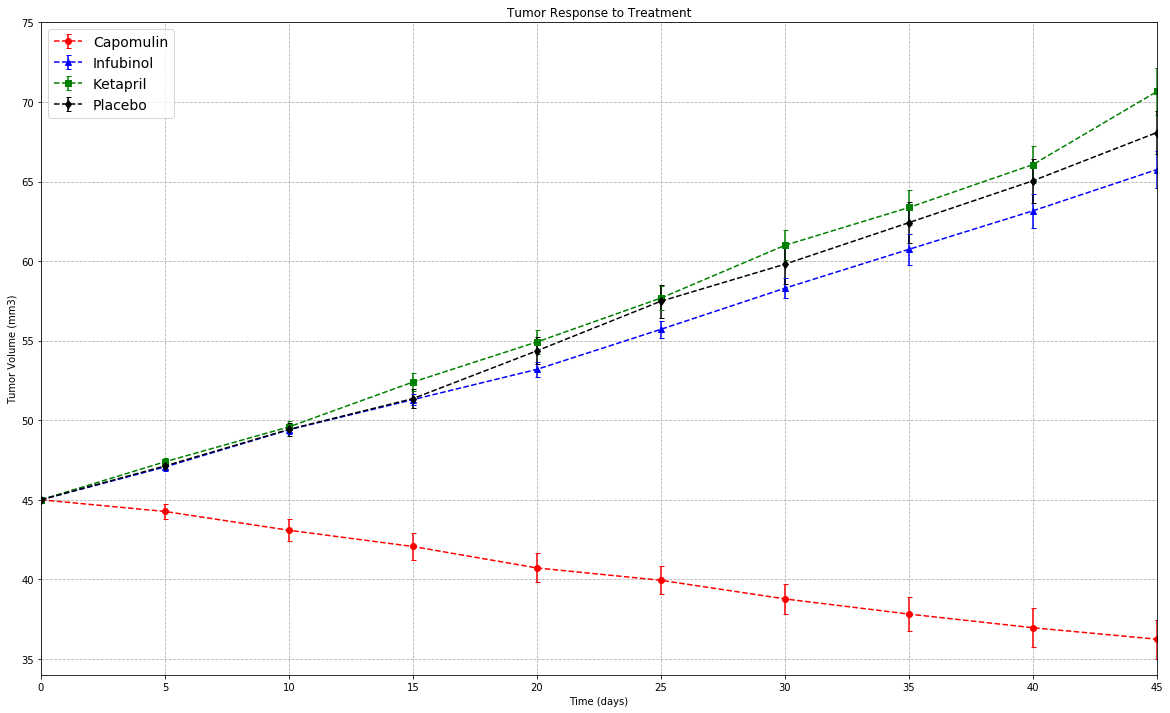

<Figure size 432x288 with 0 Axes>

In [227]:
plt.figure(figsize=(20,12))

plt.errorbar(pivot_tumor_vol.index,pivot_tumor_vol['Capomulin'],
             yerr=pivot_sem['Capomulin'],color="r",marker="o",capsize = 2.5,ls="dashed", label = "Capomulin")
plt.errorbar(pivot_tumor_vol.index,pivot_tumor_vol['Infubinol'],
             yerr=pivot_sem['Infubinol'],color="b",marker="^",capsize = 2.5,ls="dashed", label = "Infubinol")
plt.errorbar(pivot_tumor_vol.index,pivot_tumor_vol['Ketapril'],
             yerr=pivot_sem['Ketapril'],color="g",marker="s",capsize = 2.5, ls="dashed",label = "Ketapril")
plt.errorbar(pivot_tumor_vol.index,pivot_tumor_vol['Placebo'],
             yerr=pivot_sem['Placebo'],color="black",marker="d",capsize = 2.5,ls="dashed", label = "Placebo")

# Add legend
plt.legend(loc="best",fontsize=14,fancybox=True)

# Add gridlines
plt.grid(alpha = 1)
plt.grid(linestyle="dashed")


# Add labels
plt.title('Tumor Response to Treatment')
plt.xlabel('Time (days)')
plt.ylabel('Tumor Volume (mm3)')

# Add x limits and y limits
plt.xlim(0,45)
plt.ylim(34,75)


# Show the Figure
plt.show()
# save the Figure
plt.savefig("image1.png")

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [127]:
meta=merged_df.groupby(['Drug','Timepoint'])
Meta_means=pd.DataFrame(grouped_df['Metastatic Sites'].mean())
Meta_means.rename(columns={'Metastatic Sites':'Mean Metastatic Sites'},inplace=True)
Meta_means.reset_index(inplace=True)
Meta_means.head()

,Drug,Timepoint,Mean Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [128]:
pivot_Meta_means=Meta_means.pivot(index='Timepoint',columns='Drug', values='Mean Metastatic Sites')

pivot_Meta_means

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [129]:

Meta_Err=pd.DataFrame(grouped_df['Metastatic Sites'].sem())
Meta_Err.rename(columns={'Metastatic Sites':'sem Metastatic Sites'},inplace=True)
Meta_Err.reset_index(inplace=True)
Meta_Err.head()

,Drug,Timepoint,sem Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [130]:
pivot_Meta_sem=Meta_Err.pivot(index='Timepoint',columns='Drug', values='sem Metastatic Sites')

pivot_Meta_sem

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


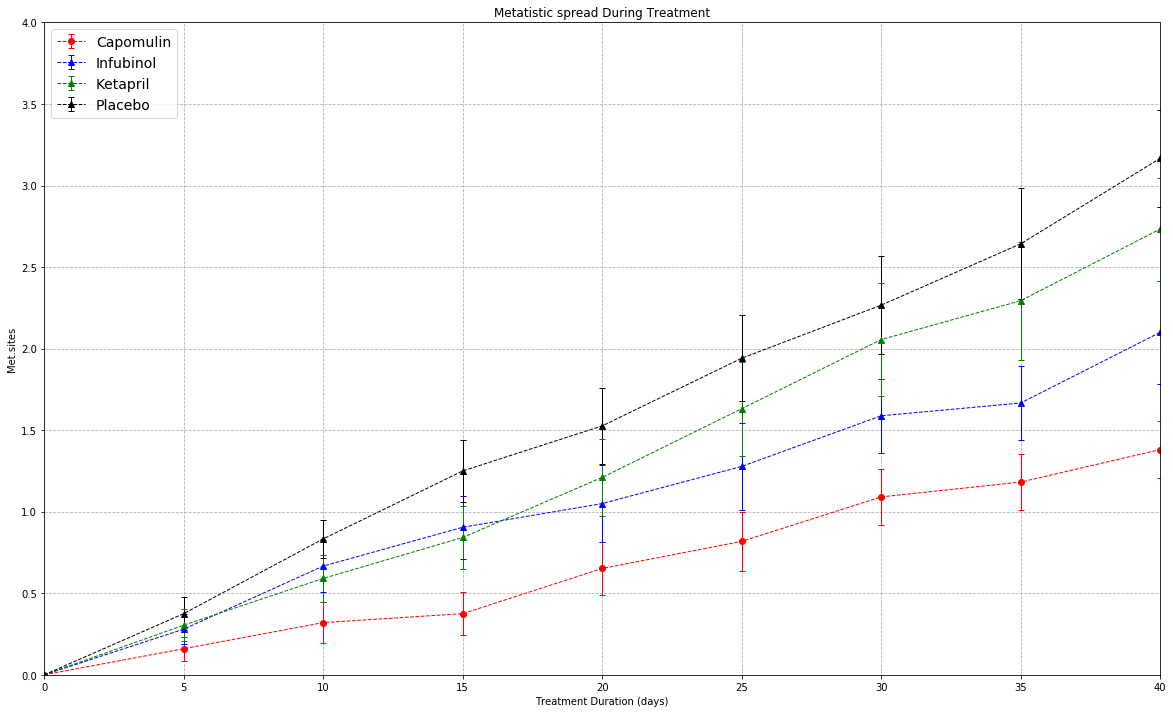

<Figure size 432x288 with 0 Axes>

In [224]:
x_axis = [0,5,10,15,20,25,30,35,40,45]
x_limit = 45
plt.figure(figsize=(20,12))


plt.errorbar(pivot_Meta_means.index,pivot_Meta_means['Capomulin'],
            yerr=pivot_Meta_sem['Capomulin'],color="r",marker="o",ls="dashed", linewidth=1, alpha=1, capsize=3, label = "Capomulin")
plt.errorbar(pivot_Meta_means.index,pivot_Meta_means['Infubinol'],
            yerr=pivot_Meta_sem['Infubinol'],color="b",marker="^",ls="dashed", linewidth=1, alpha=1, capsize=3, label = "Infubinol")
plt.errorbar(pivot_Meta_means.index,pivot_Meta_means['Ketapril'],
            yerr=pivot_Meta_sem['Ketapril'],color="g",marker="^",ls="dashed", linewidth=1, alpha=1, capsize=3, label = "Ketapril")
plt.errorbar(pivot_Meta_means.index,pivot_Meta_means['Placebo'],
            yerr=pivot_Meta_sem['Placebo'],color="black",marker="^",ls="dashed", linewidth=1, alpha=1, capsize=3, label = "Placebo")


plt.legend(loc="best",fontsize=14,fancybox=True)

# Add gridlines
plt.grid(alpha = 1)
plt.grid(linestyle="dashed")

# Add x limits and y limits
plt.xlim(0,40)
plt.ylim(0.0,4)


# Add labels
plt.title('Metatistic spread During Treatment')
plt.xlabel('Treatment Duration (days)')
plt.ylabel('Met.sites')



plt.show()

# save the Figure
plt.savefig("image1.png")






![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [132]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


In [133]:
mice_grouped=merged_df.groupby(['Drug','Timepoint'])
mice_count=pd.DataFrame(mice_grouped['Mouse ID'].count())
mice_count.rename(columns ={'Mouse ID':'Mouse Count'},inplace=True)
mice_count.reset_index(inplace=True)

mice_count.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [134]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


In [135]:
pivot_Survival_Rates=mice_count.pivot(index='Timepoint',columns='Drug',values='Mouse Count')

pivot_Survival_Rates.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


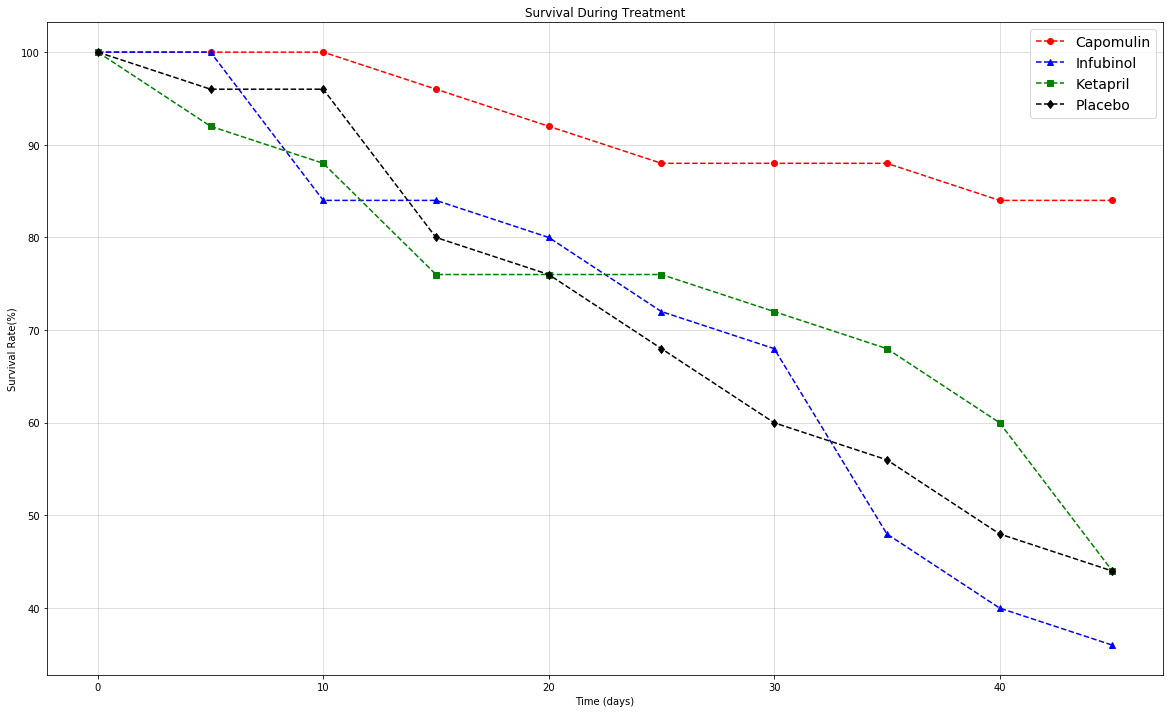

In [228]:
# Generate the Plot (Accounting for percentages)
plt.figure(figsize=(20,12))
plt.plot(pivot_Survival_Rates.index,(pivot_Survival_Rates['Capomulin']*100)/25,
         color="r",marker="o",linestyle='--',label = "Capomulin")
plt.plot(pivot_Survival_Rates.index,(pivot_Survival_Rates['Infubinol']*100)/25,
         color="b",marker="^",linestyle ='--', label ='Infubinol')
plt.plot(pivot_Survival_Rates.index,(pivot_Survival_Rates['Ketapril']*100)/25,
         color="g",marker="s",linestyle ='--', label ='Ketapril')
plt.plot(pivot_Survival_Rates.index,(pivot_Survival_Rates['Placebo']*100)/25,
         color="black",marker="d",linestyle ='--', label ='Placebo')



plt.legend(loc="best",fontsize=14,fancybox=True)
plt.grid(alpha =.5)


plt.title('Survival During Treatment')
plt.xlabel('Time (days)')
plt.ylabel('Survival Rate(%)')

plt.xlim(0,45)
plt.ylim(30,100)



plt.savefig("image1.png")

plt.show()


![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [137]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [138]:
percernt_chg=(pivot_tumor_vol.loc[45]-pivot_tumor_vol.loc[0])/pivot_tumor_vol.loc[0]*100
print(percernt_chg)

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64


In [215]:

camchange=percernt_chg["Capomulin"]
Infchange=percernt_chg["Infubinol"]
Ketchange=percernt_chg["Ketapril"]
Plachange=percernt_chg["Placebo"]
drug_change_df = pd.DataFrame({"Drug": ["Capomulin", "Infubinol", "Ketapril", "Placebo"],
                               "Percent Change": [camchange,Infchange,Ketchange,Plachange]
                              })
drug_change_df

,Drug,Percent Change
0,Capomulin,-19.475303
1,Infubinol,46.123472
2,Ketapril,57.028795
3,Placebo,51.297960


In [217]:
#drug_change_df.itertuples(index=True, name='Pandas')

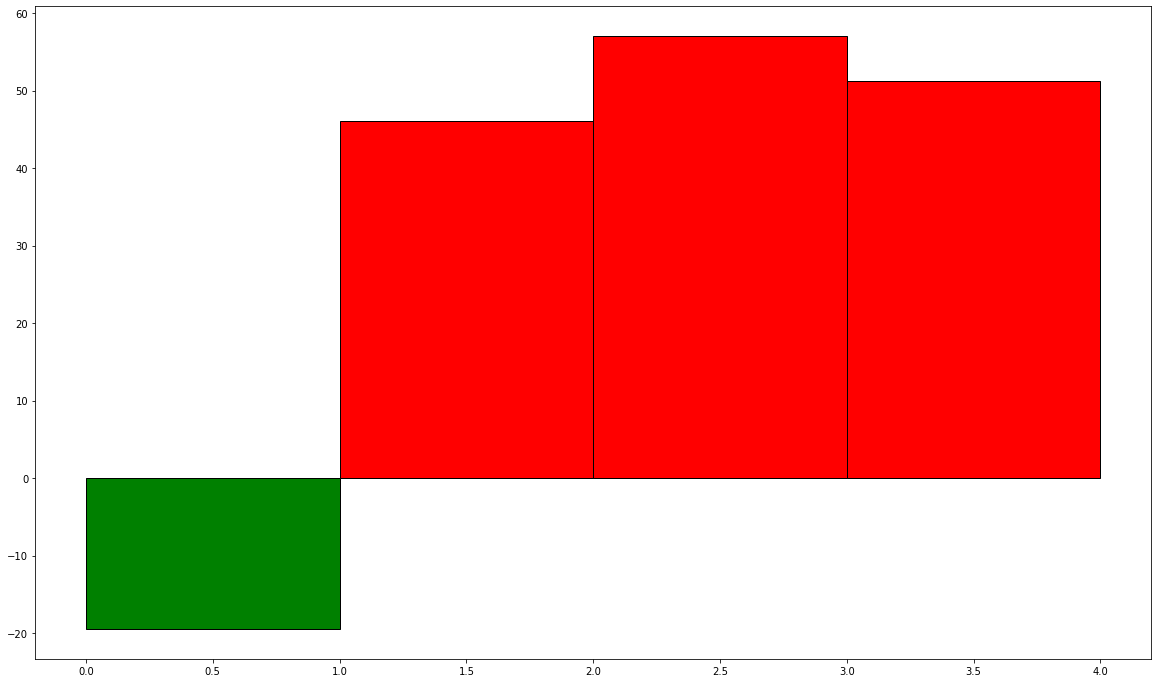

In [229]:
plt.figure(figsize=(20,12))
rects1 =plt.bar(0,drug_change_df['Percent Change'][0],color='g',alpha=1, align="edge", ec="black", width=1 )
rects2 = plt.bar(1, drug_change_df['Percent Change'][1], color='r', alpha=1, align="edge", ec="black", width=1)
rects3 = plt.bar(2, drug_change_df["Percent Change"][2], color='r', alpha=1, align="edge", ec="black", width=1)
rects4 = plt.bar(3, drug_change_df["Percent Change"][3], color='r', alpha=1, align="edge", ec="black", width=1)



In [139]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)